In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


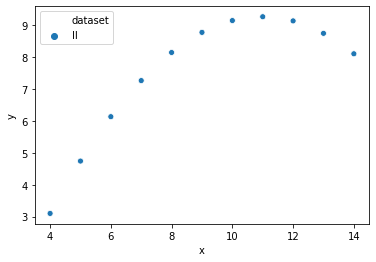

In [3]:
# plot dataset all datasets
sns.scatterplot(x='x', y='y', data=df[df['dataset'] == 'II'], hue='dataset')

In [4]:
df2 = df[df['dataset'] == 'II']

<Figure size 864x576 with 0 Axes>

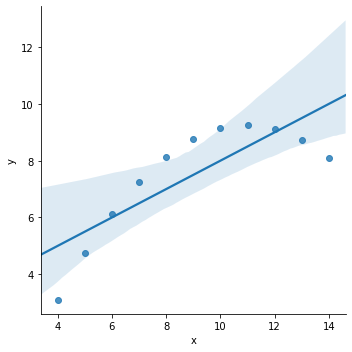

In [5]:
# plot dataset II
plt.figure(figsize=(12, 8))
sns.lmplot(x='x', y='y', data=df2)

In [8]:
# create X and y
X = df2[['x']]
y = df2['y']

In [9]:
df2

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13
20,II,7.0,7.26


In [10]:
# plot the linear regression into dataset II

In [11]:
# build a model with polynomial features
X['x2'] = X['x']**2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
X

,x,x2
11,10.0,100.0
12,8.0,64.0
13,13.0,169.0
14,9.0,81.0
15,11.0,121.0
16,14.0,196.0
17,6.0,36.0
18,4.0,16.0
19,12.0,144.0
20,7.0,49.0


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
m = LinearRegression()

In [15]:
m.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
m.score(X, y)

0.999999457857722

In [304]:
# plot the result
ypred = m.predict(X)

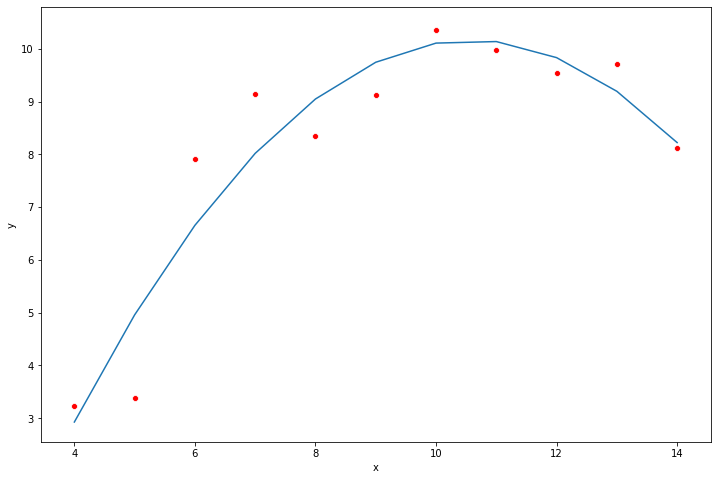

In [305]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=X['x'], y=ypred)
sns.scatterplot(x='x', y=y, data=df2, color='r')

In [309]:
from sklearn.preprocessing import PolynomialFeatures

In [332]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=0.6)
features = polynomial_features.fit_transform(df2[['x']])

In [333]:
features

array([[  1.,  10., 100.],
       [  1.,   8.,  64.],
       [  1.,  13., 169.],
       [  1.,   9.,  81.],
       [  1.,  11., 121.],
       [  1.,  14., 196.],
       [  1.,   6.,  36.],
       [  1.,   4.,  16.],
       [  1.,  12., 144.],
       [  1.,   7.,  49.],
       [  1.,   5.,  25.]])

In [308]:
# introduce Pipelin, make_pipelin
from sklearn.pipeline import Pipeline, make_pipeline

In [364]:
pipeline = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)

In [365]:
pipeline.fit(df2[['x']], y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [366]:
pipeline.score(df2[['x']], y)

0.8928166287443594

In [359]:
# introduce or look at statsmodels.api for degree 2 and 3 polynomial features
import statsmodels.api as sm

In [373]:
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
features = polynomial_features.fit_transform(df2[['x']])

In [376]:
exog_features = sm.add_constant(features)
model = sm.OLS(y, exog_features)
results = model.fit()

In [377]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     19.44
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           0.000899
Time:                        14:31:21   Log-Likelihood:                -12.784
No. Observations:                  11   AIC:                             33.57
Df Residuals:                       7   BIC:                             35.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.3833      7.453     -1.527      0.1

## Try a more complicated function

In [395]:
np.random.seed(0)
n_samples = 30

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [400]:
# create an x-array
# create an array of y-observations
# create the true y
X = np.sort(np.random.rand(n_samples))
y_train = true_fun(X) + np.random.randn(n_samples) * 0.1
y_true = true_fun(X)

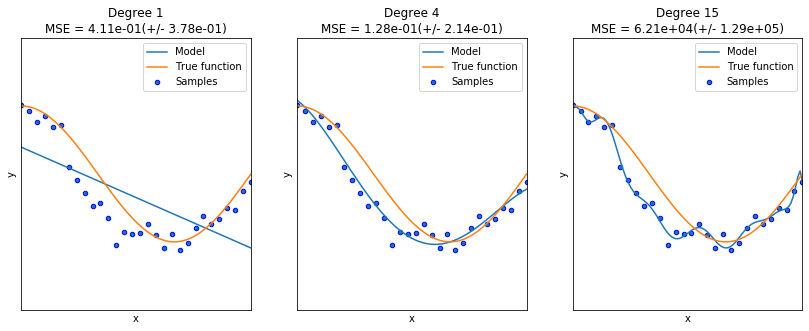

In [401]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=True)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x[:, np.newaxis], y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, x[:, np.newaxis], y_train,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(x, y_train, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()